In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Commodities', min_assets=.2), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-26 to 2019-07-10 - 21


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

10


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
BAR,47,1.022590,1.875503,0.524077,10.218412,2.700990
GLD,47,1.011796,1.869603,0.519957,10.266127,2.667662
SGOL,47,1.015925,1.885233,0.517837,10.286406,2.692057
IAU,47,1.015275,1.908812,0.511099,10.325199,2.716592
GLTR,47,0.767865,1.686043,0.431888,6.764333,3.584793
PALL,47,1.400915,3.161162,0.430611,8.345951,11.245765
PSLV,47,0.586481,1.927521,0.283680,4.805919,4.805911
DBA,47,0.353710,1.690275,0.185785,2.839500,4.012349
SIVR,47,0.220453,1.686829,0.107166,1.300483,4.517453


evicted PSLV 0.869 -0.266
evicted PALL 0.265 0.219
retry backlogs ['GLTR', 'SLV', 'IAU', 'SGOL', 'GLD', 'SIVR'] at 0.905/-0.51 - 0.629


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted SIVR 0.894 -0.302
retry backlogs ['IAU', 'SGOL', 'SLV', 'GLD', 'GLTR'] at 0.910/-0.52 - 0.629
evicted SLV 0.900 -0.305
retry backlogs ['IAU', 'SGOL', 'GLD', 'GLTR'] at 0.915/-0.53 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.920/-0.54 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.925/-0.55 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.930/-0.56 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.935/-0.57 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.940/-0.58 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.945/-0.59 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.950/-0.60 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD', 'GLTR'] at 0.955/-0.61 - 0.629
evicted GLTR 0.951 -0.204
retry backlogs ['SGOL', 'IAU', 'GLD'] at 0.960/-0.62 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD'] at 0.965/-0.63 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD'] at 0.970/-0.64 - 0.629
retry backlogs ['SGOL', 'IAU', 'GLD'] at 0.

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,47.0,0.748753,1.137796,-1.651803,-0.060680,0.769724,1.270341,3.135394,0.623197,7.252090,1.961347
BAR,47.0,1.022590,1.875503,-2.494698,0.039063,0.549017,1.564185,5.833955,0.524077,10.218412,2.700990
DBA,47.0,0.353710,1.690275,-3.039707,-0.864284,0.000000,1.955462,3.729897,0.185785,2.839500,4.012349


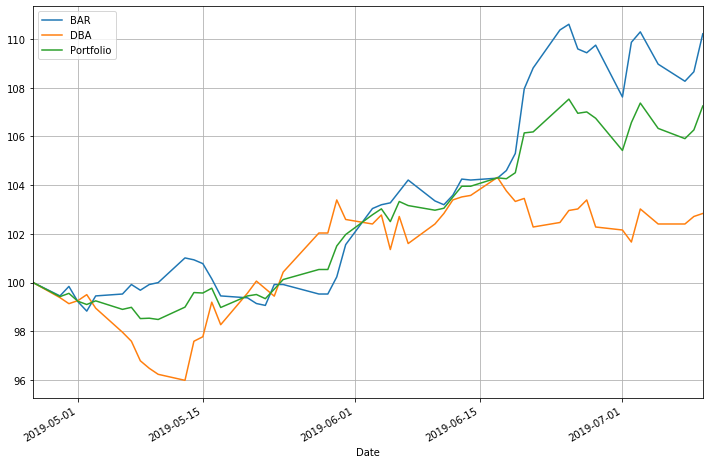

In [7]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.15)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)